In [2]:
# Titanic Survival Predictor

In [3]:
# Run only ONCE: Install necessary Python libraries

# Install pandas for data manipulation
!pip install pandas

# Install scikit-learn for machine learning models and metrics
!pip install scikit-learn

# Install matplotlib for plotting the ROC curve
!pip install matplotlib


In [11]:
# Load necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [13]:
# Load the Titanic dataset

file_path = 'Titanic_Data.csv'
titanic_df = pd.read_csv(file_path)
titanic_df.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# Step 1: Identify columns with missing values
missing_values = titanic_df.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

Columns with missing values:
 Age         177
Cabin       687
Embarked      2
dtype: int64


In [7]:
# Step 2: Drop irrelevant columns
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)

In [8]:
# Step 3: Handle missing values
# Fill missing 'Age' values with the median age
#fixed, titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
# Drop the rows with missing values of Embared
titanic_df = titanic_df.dropna(subset=['Embarked'])
titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [9]:
# Make sure there are no more missing values
missing_values = titanic_df.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

Columns with missing values:
 Series([], dtype: int64)


In [17]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# Step 4:
# Convert 'Sex' column: male = 1, female = 0
titanic_df['Sex'] = titanic_df['Sex'].astype(str).str.strip().map({'male': 1, 'female': 0})
titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
5,0,3,1,28.0,0,0,8.4583,Q
6,0,1,1,54.0,0,0,51.8625,S
7,0,3,1,2.0,3,1,21.0750,S
8,1,3,0,27.0,0,2,11.1333,S
9,1,2,0,14.0,1,0,30.0708,C


In [11]:
# Convert appropriate variables to categorical and numeric (by default they aare alll strings to beginn with
# Convert 'Survived', 'Pclass', 'Sex', and 'Embarked' to categorical variables
titanic_df['Survived'] = pd.Categorical(titanic_df['Survived'])
titanic_df['Pclass'] = pd.Categorical(titanic_df['Pclass'])
titanic_df['Sex'] = pd.Categorical(titanic_df['Sex'])
titanic_df['Embarked'] = pd.Categorical(titanic_df['Embarked'])

# Convert 'Age', 'SibSp', 'Parch', and 'Fare' to numerical variables
titanic_df['Age'] = pd.to_numeric(titanic_df['Age'], errors='coerce')
titanic_df['SibSp'] = pd.to_numeric(titanic_df['SibSp'], errors='coerce')
titanic_df['Parch'] = pd.to_numeric(titanic_df['Parch'], errors='coerce')
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')

In [12]:
# Step 5: Split the data into features and target variable
X = titanic_df.drop('Survived', axis=1)  # Features
X = pd.get_dummies(X, drop_first=True)
y = titanic_df['Survived']  # Target variable
X.head(10)

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_1,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,False,True,True,False,True
1,38.0,1,0,71.2833,False,False,False,False,False
2,26.0,0,0,7.9250,False,True,False,False,True
3,35.0,1,0,53.1000,False,False,False,False,True
4,35.0,0,0,8.0500,False,True,True,False,True
5,28.0,0,0,8.4583,False,True,True,True,False
6,54.0,0,0,51.8625,False,False,True,False,True
7,2.0,3,1,21.0750,False,True,True,False,True
8,27.0,0,2,11.1333,False,True,False,False,True
9,14.0,1,0,30.0708,True,False,False,False,False


In [13]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 7: Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
trained_model = model.fit(X_train, y_train)

In [15]:
# Step 8: Make predictions on the test set
y_pred = trained_model.predict(X_test)
y_pred_proba = trained_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

In [16]:
# Step 9: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

In [17]:
# Display the results
print("Model Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC:", auc)


Model Performance Metrics:
Accuracy: 0.7584269662921348
Precision: 0.6666666666666666
Recall: 0.7536231884057971
F1-Score: 0.7074829931972789
AUC: 0.7455790453397154


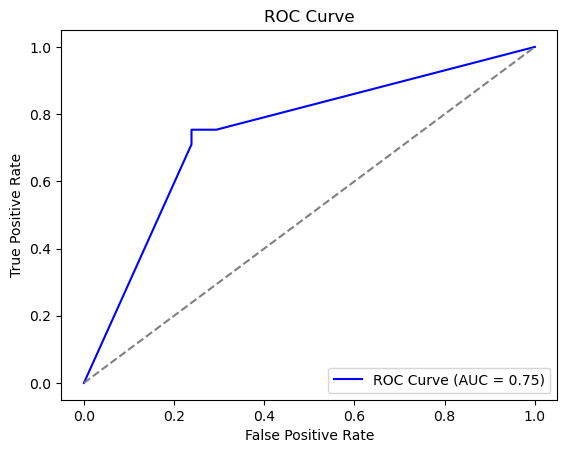

In [18]:
# Step 10: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [19]:
import pickle

In [20]:
model_filename = 'decision_tree_model.pkl'
with open(model_filename, 'wb') as f:  # Open the file in write-binary mode
    pickle.dump(trained_model, f)  # Serialize the model object

print(f"Model saved as {model_filename}")


Model saved as decision_tree_model.pkl
